# PyTorch


* GPU Supports for Pytorch: Tensor computation(like numpy) with gpu support
* Autograd : Autonomatically helps to find derivatives for backpropagation
    * Enables us to write about tensor functionally and differentiate through them

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

C:\Users\eight\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\eight\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\eight\anaconda3\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [13]:
x=torch.empty(5,4) #free up the memory for 5,4 tensor but not initilize them, may print the previous values in the memory
x

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [9]:
x.size()

torch.Size([5, 4])

In [10]:
x.view(4,5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [16]:
x.view(10,-1)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [27]:
%%time
for i in range(100):
    a=np.random.randn(100,100)
    b=np.random.randn(100,100)
    c=np.matmul(a,b)

Wall time: 500 ms


In [28]:
%%time
for j in range(100):
    a=torch.randn([100,100])
    b=torch.randn([100,100])
    c=torch.matmul(a,b)

Wall time: 240 ms


In [30]:
print(torch.cuda.device_count())

0


### Autograd
* Gradient measure change in rate in all direction(dimension) (i direction, j direction and k direction)
    * Gradient takes scaler input f and produces the vector output grad(f)
* Diversion measure how much stuff is sourcing out from a point and produces the scaler
    * Produced by the dot product of the Del operator with vec(f).
    
* Curl used to measure how much stuff swirling around the circle or measure circulation around a point and produces the vector field.
    * Produces by the cross product of the Del operator with vec(f).

In [45]:
x=torch.randn([5,5],requires_grad=True)

In [46]:
x

tensor([[-1.3051,  0.8881,  1.8327,  0.0154, -1.4408],
        [ 0.0757,  1.4715,  1.7444, -1.0879,  1.0480],
        [-0.7852, -0.9906, -0.7456,  2.1145, -0.6701],
        [ 0.9015,  0.8889,  0.8329,  1.1189, -0.1587],
        [-0.7747,  2.7305,  0.6894,  0.4700,  0.7804]], requires_grad=True)

In [47]:
y=x+5
print(y)

tensor([[3.6949, 5.8881, 6.8327, 5.0154, 3.5592],
        [5.0757, 6.4715, 6.7444, 3.9121, 6.0480],
        [4.2148, 4.0094, 4.2544, 7.1145, 4.3299],
        [5.9015, 5.8889, 5.8329, 6.1189, 4.8413],
        [4.2253, 7.7305, 5.6894, 5.4700, 5.7804]], grad_fn=<AddBackward0>)


In [48]:
z=y*y+5
print(z)

tensor([[18.6521, 39.6695, 51.6856, 30.1538, 17.6678],
        [30.7627, 46.8807, 50.4863, 20.3045, 41.5783],
        [22.7641, 21.0753, 23.1001, 55.6168, 23.7484],
        [39.8279, 39.6797, 39.0227, 42.4405, 28.4383],
        [22.8535, 64.7602, 37.3696, 34.9205, 38.4130]], grad_fn=<AddBackward0>)


In [49]:
t=torch.sum(z)

In [50]:
print(t)

tensor(881.8721, grad_fn=<SumBackward0>)


In [38]:
t.backward()

In [39]:
x.grad

tensor([[10.8175,  9.5941,  9.8731, 13.6940, 10.4851],
        [12.8991, 11.0305, 10.3802, 11.7053, 10.6233],
        [ 8.7098, 10.8260,  9.2603,  7.7155,  8.2015],
        [ 8.5996, 11.3607,  6.9144,  7.8093,  9.8676],
        [ 9.3313, 11.6528,  7.2501, 11.0153, 11.4912]])

In [40]:
t

tensor(773.3209, grad_fn=<SumBackward0>)

In [41]:
z

tensor([[34.2544, 28.0115, 29.3696, 51.8815, 32.4842],
        [46.5965, 35.4177, 31.9371, 39.2535, 33.2135],
        [23.9651, 34.3008, 26.4385, 19.8822, 21.8161],
        [23.4882, 37.2663, 16.9523, 20.2463, 29.3426],
        [26.7684, 38.9472, 18.1409, 35.3344, 38.0119]], grad_fn=<AddBackward0>)

In [44]:
print(y.grad)

None


In [51]:
l_r=0.01
w=torch.tensor([1.],requires_grad=True)

In [55]:
b=torch.tensor([1.],requires_grad=True)

In [56]:
print(w.item())
print(b.item())

1.0
1.0


In [60]:
%%time
for i in range(10):
    x=torch.randn([20,1])
    y=3*x-2
    
    y_hat=w*x+b
    loss=torch.sum((y_hat-y)**2)
    
    loss.backward()
    
    with torch.no_grad():
        w-=l_r*w.grad
        b-=l_r*b.grad
        w.grad.zero_()
        b.grad.zero_()
        
    print(w.item(),b.item())
    

1.928354024887085 -0.23806297779083252
2.499338150024414 -1.096623420715332
2.734604835510254 -1.4956908226013184
2.9240565299987793 -1.7435133457183838
2.9357612133026123 -1.8414702415466309
2.936767339706421 -1.89857017993927
2.97336483001709 -1.9425022602081299
2.986658811569214 -1.967703938484192
2.992415189743042 -1.9814064502716064
2.9939968585968018 -1.9884430170059204
Wall time: 30 ms


In [81]:
l_r=0.001
N=1000
epochs=2000
w=torch.rand([N],requires_grad=True)
b=torch.ones([1],requires_grad=True)

In [82]:
%%time

print(torch.mean(w).item(),b.item())
for i in range(epochs):
    x=torch.randn([N])
    y=torch.dot(3*torch.ones([N]),x)-2
    
    y_hat=torch.dot(w,x)+b
    loss=torch.sum((y_hat-y)**2)
    
    loss.backward()
    
    with torch.no_grad():
        w-=l_r*w.grad
        b-=l_r*b.grad
        w.grad.zero_()
        b.grad.zero_()
        
    print(torch.mean(w).item(),b.item())
    

0.5017088651657104 1.0
0.5027089715003967 1.0868417024612427
0.521045446395874 1.3880529403686523
0.5307946801185608 1.611374020576477
0.5311251282691956 1.6703295707702637
0.531803548336029 1.5875437259674072
0.5327456593513489 1.4969793558120728
0.5600581765174866 1.8738346099853516
0.5607907176017761 1.8161853551864624
0.5655753016471863 1.957788109779358
0.567371666431427 2.0351810455322266
0.5747179985046387 2.197091579437256
0.575468122959137 2.1419713497161865
0.5755710005760193 2.1213810443878174
0.5805518627166748 2.280824661254883
0.5799933075904846 2.248971700668335
0.5799301862716675 2.2069764137268066
0.5901342630386353 2.472069263458252
0.5896968245506287 2.514195442199707
0.5896969437599182 2.514296293258667
0.5994576215744019 2.307882070541382
0.6126850843429565 2.540907382965088
0.6126760840415955 2.5420241355895996
0.6131182312965393 2.497443675994873
0.6147962808609009 2.399188995361328
0.6155011057853699 2.348440170288086
0.6179488301277161 2.451591968536377
0.63459

1.8079495429992676 -5.214757919311523
1.8380520343780518 -4.847536087036133
1.8374388217926025 -4.8779296875
1.8376617431640625 -4.889044761657715
1.8408634662628174 -4.836052417755127
1.8464112281799316 -4.559301376342773
1.847319483757019 -4.530228137969971
1.8569220304489136 -4.214165210723877
1.8573678731918335 -4.202658653259277
1.8572598695755005 -4.265950679779053
1.858927607536316 -4.146899700164795
1.858901023864746 -4.144052982330322
1.8563508987426758 -4.046733856201172
1.8571470975875854 -4.010375022888184
1.8531972169876099 -3.7958948612213135
1.8536471128463745 -3.824955463409424
1.8562055826187134 -4.095920562744141
1.8630415201187134 -3.9376935958862305
1.8638172149658203 -4.209112167358398
1.8638750314712524 -4.206632137298584
1.8712165355682373 -4.0254645347595215
1.882843017578125 -3.7151172161102295
1.8829472064971924 -3.707613468170166
1.8887152671813965 -3.877070188522339
1.8891233205795288 -3.997333288192749
1.8946847915649414 -3.8788273334503174
1.89516997337341

2.4451608657836914 -8.110942840576172
2.4451489448547363 -8.106520652770996
2.4460160732269287 -8.157546043395996
2.4472248554229736 -8.2518892288208
2.4465389251708984 -8.223637580871582
2.4428000450134277 -8.323476791381836
2.444685220718384 -8.26716423034668
2.4445600509643555 -8.32787799835205
2.451002359390259 -8.135568618774414
2.453791618347168 -8.069165229797363
2.4534146785736084 -8.085847854614258
2.4544172286987305 -8.150965690612793
2.457113027572632 -8.1060209274292
2.457095146179199 -8.179235458374023
2.458372116088867 -7.946199893951416
2.4612228870391846 -7.646650791168213
2.4792864322662354 -7.278765678405762
2.4774224758148193 -7.49847412109375
2.470782518386841 -7.608226299285889
2.4763498306274414 -7.40744686126709
2.477562665939331 -7.553098678588867
2.475857973098755 -7.511318683624268
2.478161096572876 -7.563026428222656
2.4776649475097656 -7.585930347442627
2.474245548248291 -7.473593235015869
2.4826955795288086 -7.625537872314453
2.4849114418029785 -7.507576465

2.801582098007202 -3.7259812355041504
2.8014185428619385 -3.6128427982330322
2.7961134910583496 -3.49381947517395
2.791557550430298 -3.305039644241333
2.795437812805176 -3.1167027950286865
2.7898354530334473 -3.017354726791382
2.791898727416992 -3.1054396629333496
2.792165517807007 -3.1498258113861084
2.7939162254333496 -3.0618131160736084
2.7906875610351562 -2.971928596496582
2.79095721244812 -2.962148666381836
2.791393995285034 -3.072335720062256
2.788006067276001 -2.9858646392822266
2.788017511367798 -3.0788583755493164
2.7890126705169678 -3.190619707107544
2.7887086868286133 -3.1310408115386963
2.7937533855438232 -3.0522632598876953
2.800194263458252 -2.895383834838867
2.8007895946502686 -2.7047135829925537
2.800175189971924 -2.5873708724975586
2.7999303340911865 -2.571300983428955
2.8003365993499756 -2.5875327587127686
2.799093246459961 -2.5037589073181152
2.8034682273864746 -2.7597718238830566
2.8034567832946777 -2.76126766204834
2.80354642868042 -2.7853903770446777
2.80376029014

2.7147324085235596 -3.6541740894317627
2.716761827468872 -3.7970752716064453
2.7155590057373047 -4.027684211730957
2.712489604949951 -3.8077008724212646
2.7077929973602295 -4.043856143951416
2.7080512046813965 -3.9706101417541504
2.693596601486206 -3.810931444168091
2.6920313835144043 -3.837357997894287
2.693103075027466 -3.781679630279541
2.6958677768707275 -3.921647787094116
2.6943535804748535 -4.0143866539001465
2.6941826343536377 -4.025412082672119
2.69522762298584 -3.85782527923584
2.691619873046875 -3.7082295417785645
2.6890506744384766 -3.873436689376831
2.689270257949829 -3.7560369968414307
2.702749490737915 -3.996500253677368
2.7039499282836914 -3.945690155029297
2.6997272968292236 -3.880650520324707
2.7044882774353027 -3.781278610229492
2.7029881477355957 -3.821099042892456
2.705030679702759 -3.7690155506134033
2.7053098678588867 -3.796903610229492
2.7089943885803223 -3.981003522872925
2.7163078784942627 -4.181003570556641
2.7161498069763184 -4.204864978790283
2.7165496349334

2.9757490158081055 -4.958649158477783
2.9757890701293945 -5.000802040100098
2.9752819538116455 -4.9538140296936035
2.972602367401123 -4.904548645019531
2.9729034900665283 -4.777300834655762
2.978231906890869 -4.882734775543213
2.9648447036743164 -4.641419887542725
2.9642879962921143 -4.625922203063965
2.9573402404785156 -4.44080114364624
2.957207441329956 -4.444038391113281
2.9574685096740723 -4.435390949249268
2.9584639072418213 -4.29047966003418
2.958742618560791 -4.322765827178955
2.9588022232055664 -4.461869239807129
2.9485888481140137 -4.669711112976074
2.949878454208374 -4.640633583068848
2.9495904445648193 -4.670240879058838
2.9500577449798584 -4.649209022521973
2.9595015048980713 -4.2796149253845215
2.9601545333862305 -4.4221296310424805
2.9628188610076904 -4.612957954406738
2.9628889560699463 -4.603796005249023
2.964930772781372 -4.748783111572266
2.965179204940796 -4.7212300300598145
2.9676856994628906 -4.635067462921143
2.964733839035034 -4.546431064605713
2.9607961177825928

In [70]:
torch.mean(w)

tensor(1.7288e+08, grad_fn=<MeanBackward0>)

## Creating a simple Neural Network through PyTorch

In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [90]:
from sklearn.datasets import make_blobs

In [87]:
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import math
import matplotlib

In [86]:
torch.manual_seed(0)

In [88]:
my_cmp=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

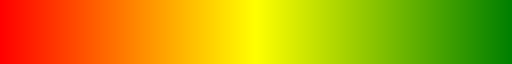

In [89]:
my_cmp

In [91]:
##Generating dataset

In [275]:
data,label=make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)

In [276]:
print(data.shape,label.shape)

(1000, 2) (1000,)


In [277]:
data

array([[-2.50804312,  7.86408052],
       [ 0.4666179 ,  3.86571303],
       [-2.94062621,  8.56480636],
       ...,
       [-1.13551783,  8.49272771],
       [-1.22933367,  7.75342586],
       [ 3.90485877,  0.683497  ]])

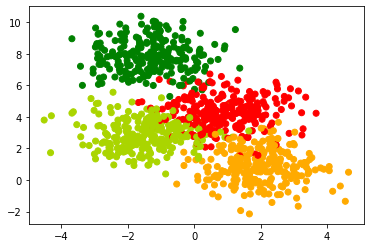

In [278]:
plt.scatter(data[:,0],data[:,1],c=label,cmap=my_cmp)
plt.show()

In [355]:
x_train,x_test,y_train,y_test=train_test_split(data,label,stratify=label,random_state=0)

In [356]:
x_train.shape

(750, 2)

In [357]:
y_train.shape

(750,)

In [358]:
x_test.shape

(250, 2)

In [359]:
y_test.shape

(250,)

In [360]:
x_train,x_test,y_train,y_test=map(torch.tensor,(x_train,x_test,y_train,y_test))

In [361]:
x_train

tensor([[ 2.1643,  4.6207],
        [ 0.1546,  8.1713],
        [-1.0550,  9.1328],
        ...,
        [-2.3174,  2.0106],
        [-2.7311,  6.5260],
        [ 1.1429,  4.9388]], dtype=torch.float64)

In [362]:
y_train.max()

tensor(3, dtype=torch.int32)

In [363]:
print(x_train.shape,y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [288]:
def model(x):
    a1=torch.matmul(x,weights_1)+bias1 #(input,features) -> (750,2) x (2,2) Weights --> output (750,2)
    h1=a1.sigmoid() #(750, 2)
    a2=torch.matmul(h1,weights_2)+bias2 # (750,2) x (2,2)
    h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1) #softmax funtion
    return h2

In [289]:
y_train.shape[0]

750

In [290]:
range(y_train.shape[0])

range(0, 750)

In [364]:
def loss_fun(y_hat,y_train):
    return -(y_hat[range(y_hat.shape[0]),y_train].log()).mean()

In [365]:
def accuracy(y_hat,y_train):
    pred=torch.argmax(y_hat,dim=1)
    return (pred==y_train).float().mean()

In [293]:
x_train.shape

torch.Size([750, 2])

In [294]:
torch.manual_seed(0)
weights_1=torch.randn(2,2)/math.sqrt(2)
weights_1.requires_grad_()
bias1=torch.zeros(2)
bias1.requires_grad_()
weights_2=torch.randn(2,4)/math.sqrt(2)
weights_2.requires_grad_()
bias2=torch.zeros(4)
bias2.requires_grad_()

l_r=0.2
epochs=1000
x_train=x_train.float()
y_train=y_train.long()

loss_arr=[]
acc_arr=[]

In [235]:
weights_1

tensor([[ 1.0896, -0.2075],
        [-1.5406,  0.4019]], requires_grad=True)

In [236]:
weights_2

tensor([[-0.7669, -0.9890,  0.2852,  0.5926],
        [-0.5086, -0.2852, -0.4219,  0.1287]], requires_grad=True)

In [237]:
bias_1

tensor([0., 0.], requires_grad=True)

In [238]:
bias_2

tensor([0., 0., 0., 0.], requires_grad=True)

In [326]:
y_hat=model(x_train)

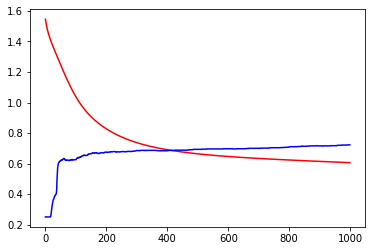

Loss before training tensor(1.5456, grad_fn=<NegBackward0>)
Loss before training tensor(0.6061, grad_fn=<NegBackward0>)
Accuracy before training tensor(0.2507)
Accuracy after training tensor(0.7227)


In [325]:


for epoch in range(epochs):
    y_hat=model(x_train)
    loss=loss_fun(y_hat,y_train)
    #print(loss)
    loss.backward()
    loss_arr.append(loss)
    acc_arr.append(accuracy(y_hat,y_train))
    
    with torch.no_grad():
        weights_1-=weights_1.grad*l_r
        bias1-=bias1.grad*l_r
        weights_2-=weights_2.grad*l_r
        bias2-=bias2.grad*l_r
        weights_1.grad.zero_()
        bias1.grad.zero_()
        weights_2.grad.zero_()
        bias2.grad.zero_()
    
plt.plot(loss_arr,'r-')
plt.plot(acc_arr,'b-')
plt.show()
print('Loss before training',loss_arr[0])
print('Loss before training',loss_arr[-1])
print('Accuracy before training',acc_arr[0])
print('Accuracy after training',acc_arr[-1])


In [150]:
weights_1

tensor([[-0.5629, -0.5762, -0.1253, -0.2169],
        [ 0.4244,  0.3460, -0.1580, -1.0576],
        [ 0.1611, -0.6317,  0.1750,  0.1541],
        [ 0.0599,  0.6188,  0.5584, -0.1236]])

In [240]:
import torch.nn.functional as fn

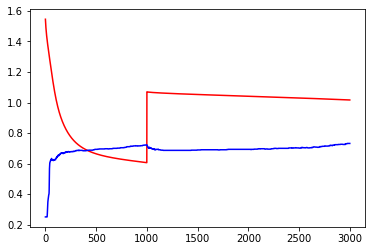

Loss before training tensor(1.5456, grad_fn=<NegBackward0>)
Loss before training 1.0167268514633179
Accuracy before training tensor(0.2507)
Accuracy after training tensor(0.7320)


In [244]:


for epoch in range(epochs):
    y_hat=model(x_train)
    loss=fn.cross_entropy(y_hat,y_train)
    #print(loss)
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat,y_train))
    
    with torch.no_grad():
        weights_1-=weights_1.grad*l_r
        bias1-=bias1.grad*l_r
        weights_2-=weights_2.grad*l_r
        bias2-=bias2.grad*l_r
        weights_1.grad.zero_()
        bias1.grad.zero_()
        weights_2.grad.zero_()
        bias2.grad.zero_()
    
plt.plot(loss_arr,'r-')
plt.plot(acc_arr,'b-')
plt.show()
print('Loss before training',loss_arr[0])
print('Loss before training',loss_arr[-1])
print('Accuracy before training',acc_arr[0])
print('Accuracy after training',acc_arr[-1])


In [374]:
## Using NN parameter
x_train=x_train.float()
y_train=y_train.long()

In [375]:
class The_model(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.weights_1=nn.Parameter(torch.randn(2,2)/math.sqrt(2))
        self.bias1=nn.Parameter(torch.zeros(2))
        self.weights_2=nn.Parameter(torch.randn(2,4)/math.sqrt(2))
        self.bias2=nn.Parameter(torch.zeros(4))
        
    def forward(self,x):
        a1=torch.matmul(x,self.weights_1)+self.bias1 #(input,features) -> (750,2) x (2,2) Weights --> output (750,2)
        h1=a1.sigmoid() #(750, 2)
        a2=torch.matmul(h1,self.weights_2)+self.bias2 # (750,2) x (2,4)
        h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1) #softmax funtion
        #print(h2.shape)
        return h2
        

In [376]:
def fit(epochs=10000,l_r=1):
    loss_arr=[]
    acc_arr=[]
    for epoch in range(epochs):
        y_hat=net(x_train.float())
        loss=loss_fun(y_hat,y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat,y_train))
        loss.backward()
        
        with torch.no_grad():
            for param in net.parameters():
                param-=l_r*param.grad
            net.zero_grad()
    plt.plot(loss_arr,'r-')
    plt.plot(acc_arr,'b-')
    plt.show()
    print("Loss before training",loss_arr[0])
    print("Loss after training",loss_arr[-1])
    print("Accuracy before training",acc_arr[0])
    print("Accuracy after training",acc_arr[-1])
        

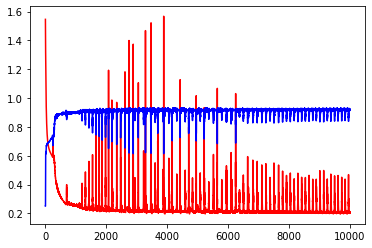

Loss before training 1.5456440448760986
Loss after training 0.2120579034090042
Accuracy before training tensor(0.2507)
Accuracy after training tensor(0.9147)


In [377]:
net=The_model()
fit()

### Setting up the optimizer

In [378]:
from torch import optim

In [379]:
def fit_v1():
    loss_arr=[]
    acc_arr=[]
    opt=optim.SGD(net.parameters(),lr=l_r)
    
    for epoch in range(epochs):
        y_hat=net(x_train)
        loss=fn.cross_entropy(y_hat,y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat,y_train))
        
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    plt.plot(loss_arr,'r-')
    plt.plot(acc_arr,'b-')
    plt.plot()
    print("Loss before training",loss_arr[0])
    print("Loss after training",loss_arr[-1])
    print("Accuracy before training",acc_arr[0])
    print("Accuracy after training", acc_arr[-1])

Loss before training 1.4111982583999634
Loss after training 1.1253830194473267
Accuracy before training tensor(0.2507)
Accuracy after training tensor(0.6800)


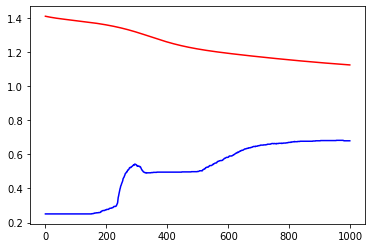

In [380]:
net=The_model()
fit_v1()

### Using nn.Sequential

In [381]:
import torch.nn as nn

In [394]:
class The_model_v2(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        
        self.net=nn.Sequential(nn.Linear(2,128),nn.Sigmoid(),nn.Linear(128,4),nn.Softmax())
        
    def forward(self,x):
        return self.net(x)

        

In [395]:
def fit_v3(x,y,model,opt,loss_fn,epochs=1000):
    for epoch in range(epochs):
        loss=loss_fn(model(x),y)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    return loss.item()

In [401]:
fnet=The_model_v2()

opt=optim.SGD(fnet.parameters(),lr=0.01)
opt1=optim.SGD(fnet.parameters(),lr=0.01,momentum=0.9)
opt2=optim.Adam(fnet.parameters(),lr=0.01)
opt3=optim.RMSprop(fnet.parameters(),lr=0.011)
print("SGD optimizer Loss:",fit_v3(x_train,y_train,fnet,opt,fn.cross_entropy))
print("SGD optimizer with momentum 9 Loss:",fit_v3(x_train,y_train,fnet,opt,fn.cross_entropy))
print("Adam optimzer Loss:",fit_v3(x_train,y_train,fnet,opt2,fn.cross_entropy))
print("RMSprop optimizer Loss:",fit_v3(x_train,y_train,fnet, opt3,fn.cross_entropy))

C:\Users\eight\anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


SGD optimizer Loss: 1.0769597291946411
SGD optimizer with momentum 9 Loss: 0.981900155544281
Adam optimzer Loss: 0.8003982901573181
RMSprop optimizer Loss: 0.800544261932373


In [397]:
import time

In [398]:
device = torch.device('cpu') # for cuda change it to "cuda"
x_train=x_train.to(device)
y_train=y_train.to(device)
network=The_model_v2()
network.to(device)
tic=time.time()
print("Final Loss ",fit_v3(x_train,y_train,network, opt, fn.cross_entropy))
toc=time.time()
print("Time taken ",(toc-tic))

Final Loss  1.398587942123413
Time taken  1.9344968795776367
